In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.metrics import make_scorer,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por-modelling-range_G3_10-repaired_G3_0_values.pkl')

df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,6,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,6,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,7,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,7,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [3]:
df_por.shape

(649, 44)

In [4]:
X = np.array(df_por.drop('G3',axis = 1))
y = np.array(df_por['G3'])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Linear Regression 

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pred = model.predict(X_test)

In [8]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,7.168213,10
1,6.730316,6
2,7.675385,9
3,6.525024,6
4,5.428436,6


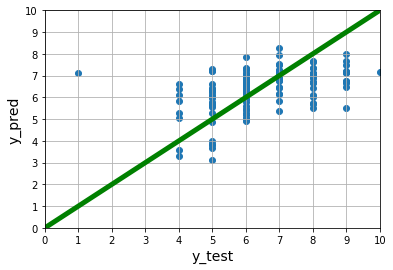

In [9]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [10]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [11]:
rmse(y_pred,y_test)

1.3454797466829331

## Decision Tree Regression

In [12]:
rmse_scorer = make_scorer(rmse,greater_is_better = False)

In [13]:
param_grid = {'min_samples_leaf':[1,5,10,20,50,100],'max_depth':[1,2,5,10,20,30,50]}

grid_search_cv = GridSearchCV(estimator = DecisionTreeRegressor(),param_grid = param_grid,cv=5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100]},
             pre_di

In [14]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [15]:
y_pred = grid_search_cv.predict(X_test)

In [16]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.840000,10
1,6.467742,6
2,6.840000,9
3,6.840000,6
4,6.051282,6


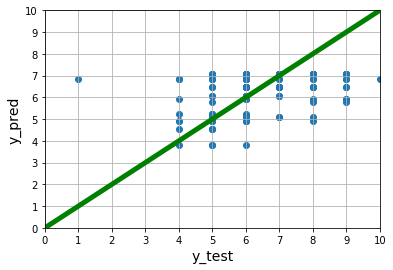

In [17]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [18]:
rmse(y_pred,y_test)

1.416353078215737

## Random Forest Regression

In [19]:
param_grid = {'min_samples_leaf':[1,10,50],'max_depth':[1,5,30],'n_estimators':[10,50,100]}

grid_search_cv = GridSearchCV(estimator = RandomForestRegressor(),param_grid = param_grid,cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [20]:
grid_search_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
y_pred = grid_search_cv.predict(X_test)

In [22]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.703926,10
1,6.587418,6
2,7.066652,9
3,6.709790,6
4,6.091114,6


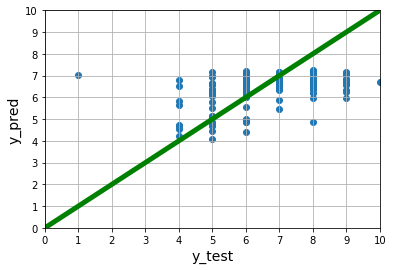

In [23]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [24]:
rmse(y_pred,y_test)

1.3458436885987908

## XGBoost 

In [25]:
parameters = {'max_depth':[1,5,30],'learning_rate':[0.01,0.1,0.3],'n_estimators':[10,50,100],'objective':'reg:squarederror'}

grid_search_cv = GridSearchCV(estimator = xgboost.XGBRegressor(silent = True),param_grid = param_grid,
                              cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 30],
                         'min_samples_leaf': [1, 10, 50],
                        

In [26]:
grid_search_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, min_samples_leaf=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1, verbosity=1)

In [27]:
y_pred = grid_search_cv.predict(X_test)

In [28]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.528602,10
1,6.394935,6
2,6.714759,9
3,6.571812,6
4,5.928159,6


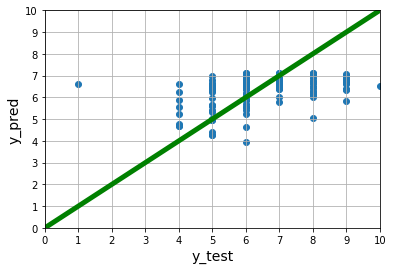

In [29]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [30]:
rmse(y_pred,y_test)

1.3326497561013029

## Neural Network 

In [31]:
sc = MinMaxScaler()

In [32]:
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_train.shape

(519, 43)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [36]:
model.fit(X_train,y_train,validation_data = (X_test,y_test.values),batch_size = 128,epochs = 300)

Train on 519 samples, validate on 130 samples
Epoch 1/300
519/519 [==============================] - 1s 2ms/sample - loss: 46.0910 - val_loss: 45.2011
Epoch 2/300
519/519 [==============================] - 0s 35us/sample - loss: 40.7506 - val_loss: 41.2192
Epoch 3/300
519/519 [==============================] - 0s 60us/sample - loss: 36.9377 - val_loss: 37.5044
Epoch 4/300
519/519 [==============================] - 0s 60us/sample - loss: 33.1642 - val_loss: 32.9604
Epoch 5/300
519/519 [==============================] - 0s 60us/sample - loss: 27.9970 - val_loss: 26.5904
Epoch 6/300
519/519 [==============================] - 0s 60us/sample - loss: 21.5285 - val_loss: 18.0989
Epoch 7/300
519/519 [==============================] - 0s 30us/sample - loss: 13.0526 - val_loss: 8.7929
Epoch 8/300
519/519 [==============================] - 0s 30us/sample - loss: 6.9811 - val_loss: 3.1360
Epoch 9/300
519/519 [==============================] - 0s 60us/sample - loss: 7.7205 - val_loss: 2.7767
Epoch 

519/519 [==============================] - 0s 30us/sample - loss: 2.6834 - val_loss: 3.8531
Epoch 79/300
519/519 [==============================] - 0s 30us/sample - loss: 2.7195 - val_loss: 3.7358
Epoch 80/300
519/519 [==============================] - 0s 60us/sample - loss: 2.8484 - val_loss: 2.8543
Epoch 81/300
519/519 [==============================] - 0s 60us/sample - loss: 2.8348 - val_loss: 2.7104
Epoch 82/300
519/519 [==============================] - 0s 60us/sample - loss: 2.7754 - val_loss: 3.0094
Epoch 83/300
519/519 [==============================] - 0s 60us/sample - loss: 2.8925 - val_loss: 3.2723
Epoch 84/300
519/519 [==============================] - 0s 60us/sample - loss: 2.7386 - val_loss: 3.3335
Epoch 85/300
519/519 [==============================] - 0s 30us/sample - loss: 2.5350 - val_loss: 3.1881
Epoch 86/300
519/519 [==============================] - 0s 30us/sample - loss: 2.8375 - val_loss: 3.2689
Epoch 87/300
519/519 [==============================] - 0s 60us/samp

519/519 [==============================] - 0s 60us/sample - loss: 2.4265 - val_loss: 2.8861
Epoch 156/300
519/519 [==============================] - 0s 60us/sample - loss: 2.2704 - val_loss: 2.3292
Epoch 157/300
519/519 [==============================] - 0s 60us/sample - loss: 2.3568 - val_loss: 2.5050
Epoch 158/300
519/519 [==============================] - 0s 60us/sample - loss: 2.2487 - val_loss: 3.4558
Epoch 159/300
519/519 [==============================] - 0s 30us/sample - loss: 2.3628 - val_loss: 3.1737
Epoch 160/300
519/519 [==============================] - 0s 45us/sample - loss: 2.1428 - val_loss: 2.6694
Epoch 161/300
519/519 [==============================] - 0s 60us/sample - loss: 2.1496 - val_loss: 2.4003
Epoch 162/300
519/519 [==============================] - 0s 60us/sample - loss: 2.3260 - val_loss: 2.7844
Epoch 163/300
519/519 [==============================] - 0s 30us/sample - loss: 2.2162 - val_loss: 3.2895
Epoch 164/300
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 60us/sample - loss: 1.9709 - val_loss: 2.3614
Epoch 233/300
519/519 [==============================] - 0s 60us/sample - loss: 2.0369 - val_loss: 2.1714
Epoch 234/300
519/519 [==============================] - 0s 60us/sample - loss: 2.0495 - val_loss: 2.0329
Epoch 235/300
519/519 [==============================] - 0s 30us/sample - loss: 1.8017 - val_loss: 2.1415
Epoch 236/300
519/519 [==============================] - 0s 30us/sample - loss: 1.7798 - val_loss: 2.1343
Epoch 237/300
519/519 [==============================] - 0s 60us/sample - loss: 1.9762 - val_loss: 2.3295
Epoch 238/300
519/519 [==============================] - 0s 60us/sample - loss: 1.7879 - val_loss: 2.3462
Epoch 239/300
519/519 [==============================] - 0s 60us/sample - loss: 1.9307 - val_loss: 2.0723
Epoch 240/300
519/519 [==============================] - 0s 60us/sample - loss: 1.9891 - val_loss: 1.9225
Epoch 241/300
519/519 [==============================] - 0s 

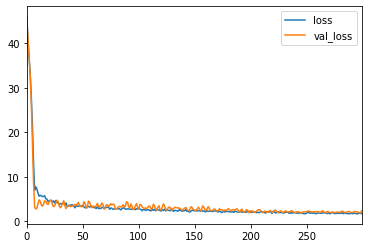

In [37]:
losses = pd.DataFrame(model.history.history)

losses.plot();

In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.199039,10
1,6.084435,6
2,6.027827,9
3,6.211521,6
4,5.441259,6


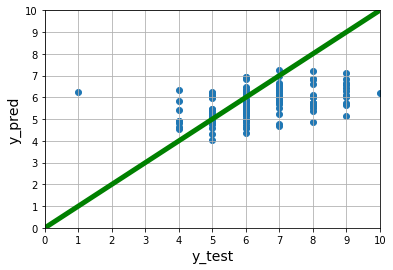

In [40]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [41]:
rmse(y_pred,y_test)

1.515664096320797

## Stacking 

In [42]:
X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size = 0.5,random_state = 42)

### Base Models 

In [43]:
model = DecisionTreeRegressor(min_samples_leaf = 20,max_depth = 10)
model.fit(X_base,y_base)

y_pred_dt_meta = model.predict(X_meta)
y_pred_dt_test = model.predict(X_test)

In [44]:
model = RandomForestRegressor(min_samples_leaf = 1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_rf_meta = model.predict(X_meta)
y_pred_rf_test = model.predict(X_test)

In [45]:
model = xgboost.XGBRegressor(silent = True,max_depth = 1,learning_rate = 0.1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_xgb_meta = model.predict(X_meta)
y_pred_xgb_test = model.predict(X_test)

In [46]:
model = Sequential()

model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

model.fit(X_train,y_train,validation_data = (X_base,y_base),batch_size = 128,epochs = 300)

Train on 519 samples, validate on 259 samples
Epoch 1/300
519/519 [==============================] - 1s 1ms/sample - loss: 38.8524 - val_loss: 35.9816
Epoch 2/300
519/519 [==============================] - 0s 60us/sample - loss: 35.1185 - val_loss: 32.4797
Epoch 3/300
519/519 [==============================] - 0s 60us/sample - loss: 30.7305 - val_loss: 27.3258
Epoch 4/300
519/519 [==============================] - 0s 30us/sample - loss: 24.9575 - val_loss: 20.3076
Epoch 5/300
519/519 [==============================] - 0s 30us/sample - loss: 17.2723 - val_loss: 11.8036
Epoch 6/300
519/519 [==============================] - 0s 30us/sample - loss: 10.0901 - val_loss: 4.5918
Epoch 7/300
519/519 [==============================] - ETA: 0s - loss: 5.803 - 0s 30us/sample - loss: 5.8653 - val_loss: 2.7591
Epoch 8/300
519/519 [==============================] - 0s 30us/sample - loss: 7.1884 - val_loss: 2.6638
Epoch 9/300
519/519 [==============================] - 0s 30us/sample - loss: 6.4658 - v

519/519 [==============================] - 0s 60us/sample - loss: 2.4772 - val_loss: 3.1660
Epoch 79/300
519/519 [==============================] - 0s 60us/sample - loss: 3.0543 - val_loss: 2.8288
Epoch 80/300
519/519 [==============================] - 0s 60us/sample - loss: 3.0084 - val_loss: 2.6304
Epoch 81/300
519/519 [==============================] - 0s 60us/sample - loss: 2.8484 - val_loss: 2.8736
Epoch 82/300
519/519 [==============================] - 0s 60us/sample - loss: 3.1514 - val_loss: 2.8995
Epoch 83/300
519/519 [==============================] - 0s 60us/sample - loss: 2.7870 - val_loss: 2.6508
Epoch 84/300
519/519 [==============================] - 0s 60us/sample - loss: 2.6210 - val_loss: 3.2970
Epoch 85/300
519/519 [==============================] - 0s 60us/sample - loss: 2.9255 - val_loss: 3.8340
Epoch 86/300
519/519 [==============================] - 0s 60us/sample - loss: 3.1378 - val_loss: 3.0249
Epoch 87/300
519/519 [==============================] - 0s 60us/samp

519/519 [==============================] - 0s 60us/sample - loss: 2.3328 - val_loss: 2.5488
Epoch 156/300
519/519 [==============================] - 0s 60us/sample - loss: 2.0770 - val_loss: 2.1153
Epoch 157/300
519/519 [==============================] - ETA: 0s - loss: 2.107 - 0s 30us/sample - loss: 2.2860 - val_loss: 1.9101
Epoch 158/300
519/519 [==============================] - 0s 30us/sample - loss: 2.3117 - val_loss: 2.0527
Epoch 159/300
519/519 [==============================] - 0s 60us/sample - loss: 2.0337 - val_loss: 2.6758
Epoch 160/300
519/519 [==============================] - 0s 60us/sample - loss: 2.1507 - val_loss: 2.6138
Epoch 161/300
519/519 [==============================] - 0s 60us/sample - loss: 2.1515 - val_loss: 2.2497
Epoch 162/300
519/519 [==============================] - 0s 60us/sample - loss: 2.1752 - val_loss: 2.2842
Epoch 163/300
519/519 [==============================] - 0s 60us/sample - loss: 2.1311 - val_loss: 2.2125
Epoch 164/300
519/519 [=============

519/519 [==============================] - 0s 60us/sample - loss: 1.8817 - val_loss: 1.3065
Epoch 233/300
519/519 [==============================] - 0s 60us/sample - loss: 2.1021 - val_loss: 1.6250
Epoch 234/300
519/519 [==============================] - 0s 60us/sample - loss: 1.9041 - val_loss: 1.6985
Epoch 235/300
519/519 [==============================] - 0s 60us/sample - loss: 1.9125 - val_loss: 1.5445
Epoch 236/300
519/519 [==============================] - 0s 60us/sample - loss: 2.1266 - val_loss: 1.3766
Epoch 237/300
519/519 [==============================] - 0s 60us/sample - loss: 2.0793 - val_loss: 1.5595
Epoch 238/300
519/519 [==============================] - 0s 60us/sample - loss: 1.8148 - val_loss: 1.4630
Epoch 239/300
519/519 [==============================] - 0s 60us/sample - loss: 1.8744 - val_loss: 1.2955
Epoch 240/300
519/519 [==============================] - 0s 30us/sample - loss: 1.8854 - val_loss: 1.3455
Epoch 241/300
519/519 [==============================] - 0s 

In [47]:
y_pred_nn_meta = model.predict(X_meta)
y_pred_nn_test = model.predict(X_test)

In [48]:
y_pred_dt_meta = pd.DataFrame(y_pred_dt_meta)
y_pred_rf_meta = pd.DataFrame(y_pred_rf_meta)
y_pred_xgb_meta = pd.DataFrame(y_pred_xgb_meta)
y_pred_nn_meta = pd.DataFrame(y_pred_nn_meta)

df_X_meta = pd.concat([y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta],axis = 1)
df_X_meta.columns = ['y_pred_dt_meta','y_pred_rf_meta','y_pred_xgb_meta','y_pred_nn_meta']

df_X_meta.head()

,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta
0,4.650000,4.80,4.962416,4.617026
1,7.000000,6.14,6.319700,5.783173
2,4.650000,4.48,4.929319,4.264832
3,7.000000,7.35,6.974045,6.884318
4,7.432432,6.96,6.906060,6.193935


In [49]:
y_pred_dt_test = pd.DataFrame(y_pred_dt_test)
y_pred_rf_test = pd.DataFrame(y_pred_rf_test)
y_pred_xgb_test = pd.DataFrame(y_pred_xgb_test)
y_pred_nn_test = pd.DataFrame(y_pred_nn_test)

df_X_test = pd.concat([y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test],axis = 1)
df_X_test.columns = ['y_pred_dt_test','y_pred_rf_test','y_pred_xgb_test','y_pred_nn_test']

df_X_test.head()

,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test
0,7.432432,6.57,6.542753,6.770744
1,6.000000,6.51,6.293830,6.247481
2,6.735294,6.62,6.564904,6.638444
3,7.432432,6.65,6.642983,5.554318
4,6.000000,6.00,5.629510,5.266111


### Meta Model 

In [50]:
model = LinearRegression()
model.fit(df_X_meta,y_meta)

y_pred_test = model.predict(df_X_test)

In [51]:
y_pred_test = pd.DataFrame(y_pred_test)

df_temp = pd.concat([y_pred_test,y_test],axis = 1)
df_temp.columns = ['y_pred_test','y_test']

df_temp.head()

,y_pred_test,y_test
0,7.965656,10
1,7.049644,6
2,7.675405,9
3,5.904700,6
4,5.639779,6


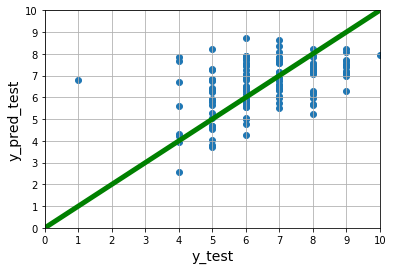

In [52]:
plt.scatter(df_temp['y_test'],df_temp['y_pred_test'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [53]:
rmse(y_pred_test,y_test)

1.3961165847466006

In [54]:
mean_absolute_error(y_pred_test,y_test)

1.0689923014652845